In [348]:
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import pandas_profiling


import pandas as pd
import numpy as np

#Plotting
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
import matplotlib.pyplot as plt

#Who likes warnings anyway?
import warnings
warnings.filterwarnings('ignore')

#Pre-processing, tuning of parameters and scoring tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score, roc_curve

#Basic text mining tools
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import text #Allow stop_words customization

#Machine Learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

#Used for distribution fitting, and representation
from scipy import stats

#Time measuring for model training
from time import time




import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS, "AIC":regr.aic, "BIC":regr.bic}

In [349]:
data=pd.read_csv('./winemag-data-130k-v2.csv')
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [350]:
data = data.assign(description_length = data['description'].apply(len))

In [351]:
data = data.assign(title_length = data['title'].apply(len))

In [352]:
us_wines = data.loc[data['country'] == 'US']

In [353]:
us_wines.shape

(54504, 16)

In [354]:
us_wines.shape[0]/data.shape[0]*100

41.93550869040016

In [355]:
us_wines.isnull().sum()

Unnamed: 0                   0
country                      0
description                  0
designation              17596
points                       0
price                      239
province                     0
region_1                   278
region_2                  3993
taster_name              16774
taster_twitter_handle    19763
title                        0
variety                      0
winery                       0
description_length           0
title_length                 0
dtype: int64

In [356]:
us_wines=us_wines.drop(columns=['Unnamed: 0', 'description', 'title'])

In [357]:
#unique values
percent = (us_wines.nunique()/len(us_wines)*100).sort_values(ascending = False)
total = us_wines.nunique().sort_values(ascending = False)
unique_data  = pd.concat([total, percent], axis=1, keys=['Total Unique Values', 'Cardinality (%)'])
unique_data.reset_index()

,index,Total Unique Values,Cardinality (%)
0,designation,14183,26.021943
1,winery,5375,9.861662
2,description_length,525,0.963232
3,region_1,264,0.484368
4,variety,257,0.471525
5,price,160,0.293556
6,title_length,111,0.203655
7,province,27,0.049538
8,points,21,0.038529
9,region_2,17,0.031190


In [358]:
#missing values
us_wines.price = us_wines.price.fillna(us_wines.price.mean())
total = us_wines.isnull().sum().sort_values(ascending = False)
percent = (us_wines.isnull().sum()/us_wines.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total Missing Records', 'Total Missing Records (%)'])
missing_data.reset_index()


,index,Total Missing Records,Total Missing Records (%)
0,taster_twitter_handle,19763,36.259724
1,designation,17596,32.283869
2,taster_name,16774,30.775723
3,region_2,3993,7.326068
4,region_1,278,0.510054
5,title_length,0,0.000000
6,description_length,0,0.000000
7,winery,0,0.000000
8,variety,0,0.000000
9,province,0,0.000000


In [359]:
us_wines.taster_name = us_wines.taster_name.replace( np.NaN ,'missing_tester_name')
us_wines.taster_twitter_handle = us_wines.taster_twitter_handle.replace( np.NaN ,'missing_tester_twitter_handle')
us_wines['tester_unique_id'] = us_wines["taster_name"].astype(str) + "-" + us_wines["taster_twitter_handle"].astype(str)
#us_wines['tester_unique_id'] = us_wines[['taster_name', 'taster_twitter_handle']].agg('-'.join, axis=1)
us_wines=us_wines.drop(columns=['taster_name', 'taster_twitter_handle'])

In [360]:
temp = us_wines.loc[(us_wines['tester_unique_id'] == 'missing_tester_name-missing_tester_twitter_handle')]
temp.shape

(16774, 12)

In [361]:
us_wines.head(10)

,country,designation,points,price,province,region_1,region_2,variety,winery,description_length,title_length,tester_unique_id
2,US,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm,186,45,Paul Gregutt-@paulgwine
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian,199,67,Alexander Peartree-missing_tester_twitter_handle
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks,249,83,Paul Gregutt-@paulgwine
10,US,Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Cabernet Sauvignon,Kirkland Signature,243,71,Virginie Boone-@vboone
12,US,NaN,87,34.0,California,Alexander Valley,Sonoma,Cabernet Sauvignon,Louis M. Martini,171,59,Virginie Boone-@vboone
14,US,NaN,87,12.0,California,Central Coast,Central Coast,Chardonnay,Mirassou,308,40,Matt Kettmann-@mattkettmann
19,US,NaN,87,32.0,Virginia,Virginia,NaN,Meritage,Quiévremont,315,36,Alexander Peartree-missing_tester_twitter_handle
20,US,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Red Blend,Quiévremont,210,45,Alexander Peartree-missing_tester_twitter_handle
21,US,NaN,87,20.0,Oregon,Oregon,Oregon Other,Pinot Noir,Acrobat,233,32,Paul Gregutt-@paulgwine
23,US,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Merlot,Bianchi,251,53,Matt Kettmann-@mattkettmann


In [362]:
us_wines.designation = us_wines.designation.replace( np.NaN ,'missing_designation')
us_wines.region_1 = us_wines.region_1.replace( np.NaN ,'region_1_missing')
us_wines.region_2 = us_wines.region_2.replace( np.NaN ,'region_2_missing')

In [363]:
temp = us_wines.loc[(us_wines['region_1'] != 'region_1_missing') & (us_wines['region_2'] == 'region_2_missing')]
temp.shape

(3715, 12)

In [364]:
temp = us_wines.loc[(us_wines['region_1'] == 'region_1_missing') & (us_wines['region_2'] != 'region_2_missing')]
temp.shape

(0, 12)

In [365]:
for i, row in us_wines.iterrows():
    if row.region_1 != 'region_1_missing' and row.region_2 == 'region_2_missing':
        us_wines.at[i, 'region_2'] = row.region_1 +' region_2_missing'

In [366]:
#label encoding

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
us_wines['tester_unique_id']= label_encoder.fit_transform(us_wines['tester_unique_id']) 
us_wines['region_1']= label_encoder.fit_transform(us_wines['region_1']) 
us_wines['region_2']= label_encoder.fit_transform(us_wines['region_2']) 

us_wines['designation']= label_encoder.fit_transform(us_wines['designation']) 
us_wines['province']= label_encoder.fit_transform(us_wines['province'])
us_wines['variety']= label_encoder.fit_transform(us_wines['variety']) 
us_wines['winery']= label_encoder.fit_transform(us_wines['winery']) 

In [367]:
us_wines['tester_unique_id'] = us_wines['tester_unique_id']/max(us_wines['tester_unique_id'])
us_wines['tester_unique_id'] = us_wines['tester_unique_id'] + 1

us_wines['region_1'] = us_wines['region_1']/max(us_wines['region_1'])
us_wines['region_1'] = us_wines['region_1'] + 1

us_wines['designation'] = us_wines['designation']/max(us_wines['designation'])
us_wines['designation'] = us_wines['designation'] + 1

us_wines['province'] = us_wines['province']/max(us_wines['province'])
us_wines['province'] = us_wines['province'] + 1

us_wines['variety'] = us_wines['variety']/max(us_wines['variety'])
us_wines['variety'] = us_wines['variety'] + 1

us_wines['winery'] = us_wines['winery']/max(us_wines['winery'])
us_wines['winery'] = us_wines['winery'] + 1

In [368]:
us_wines['region_2'] = us_wines['region_2']/max(us_wines['region_2'])
us_wines['region_2'] = us_wines['region_2'] + 1

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


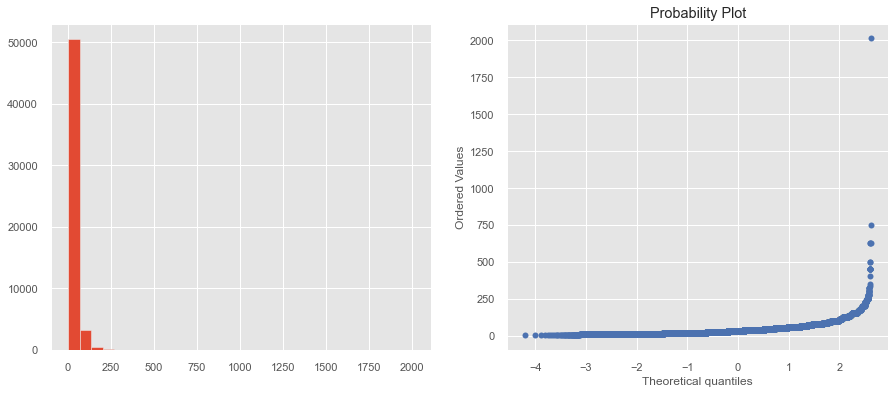

In [338]:
import matplotlib.style as style
 #sets the size of the charts
style.use('ggplot')
def util_plot(dataset, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.plot(markerfacecolor='red')
    dataset[variable].hist(bins=30)
    plt.plot(markerfacecolor='red')
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[variable], fit=True, rvalue=True, dist="norm", plot=plt)
    plt.savefig('price.svg', bbox_inches='tight')
    plt.show()
util_plot(us_wines, 'price')

In [369]:
data1= data.copy()
def util_plot(dataset, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.plot(markerfacecolor='red')
    dataset[variable].hist(bins=30)
    plt.plot(markerfacecolor='red')
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[variable], fit=True, rvalue=True, dist="norm", plot=plt)
    plt.savefig('test1.svg', bbox_inches='tight')
    plt.show()
us_wines['price'] = np.log(us_wines['price'])
#util_plot(data1, 'price')

In [340]:
def util_plot(dataset, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.plot(markerfacecolor='red')
    dataset[variable].hist(bins=30)
    plt.plot(markerfacecolor='red')
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[variable], fit=True, rvalue=True, dist="norm", plot=plt)

    plt.show()
#us_wines['description_length'] = np.log(us_wines['description_length'])
#util_plot(us_wines, 'description_length')

In [370]:
us_wines['price'].median()

3.4011973816621555

In [371]:
us_wines['price'].mean()

3.4258986849443485

In [372]:
us_wines

,country,designation,points,price,province,region_1,region_2,variety,winery,description_length,title_length,tester_unique_id
2,US,1.998096,87,2.639057,1.730769,1.969697,1.964286,1.601562,1.710644,186,45,1.666667
3,US,1.704364,87,2.564949,1.423077,1.333333,1.369048,1.667969,1.832713,199,67,1.000000
4,US,1.947331,87,4.174387,1.730769,1.969697,1.964286,1.617188,1.857090,249,83,1.666667
10,US,1.571882,87,2.944439,1.076923,1.503788,1.511905,1.105469,1.478415,243,71,1.933333
12,US,1.998096,87,3.526361,1.076923,1.003788,1.785714,1.105469,1.530889,171,59,1.933333
...,...,...,...,...,...,...,...,...,...,...,...,...
129945,US,1.440457,90,2.995732,1.076923,1.757576,1.083333,1.218750,1.097693,384,80,1.533333
129949,US,1.068603,90,3.555348,1.076923,1.503788,1.511905,1.191406,1.325456,292,60,1.933333
129950,US,1.109920,90,3.555348,1.076923,1.503788,1.511905,1.996094,1.401191,219,49,1.933333
129952,US,1.998096,90,3.091042,1.076923,1.128788,1.511905,1.996094,1.417566,236,38,1.933333


 # model selection

In [373]:
y = us_wines.points
X=us_wines.drop(columns=['country', 'points'])
X

,designation,price,province,region_1,region_2,variety,winery,description_length,title_length,tester_unique_id
2,1.998096,2.639057,1.730769,1.969697,1.964286,1.601562,1.710644,186,45,1.666667
3,1.704364,2.564949,1.423077,1.333333,1.369048,1.667969,1.832713,199,67,1.000000
4,1.947331,4.174387,1.730769,1.969697,1.964286,1.617188,1.857090,249,83,1.666667
10,1.571882,2.944439,1.076923,1.503788,1.511905,1.105469,1.478415,243,71,1.933333
12,1.998096,3.526361,1.076923,1.003788,1.785714,1.105469,1.530889,171,59,1.933333
...,...,...,...,...,...,...,...,...,...,...
129945,1.440457,2.995732,1.076923,1.757576,1.083333,1.218750,1.097693,384,80,1.533333
129949,1.068603,3.555348,1.076923,1.503788,1.511905,1.191406,1.325456,292,60,1.933333
129950,1.109920,3.555348,1.076923,1.503788,1.511905,1.996094,1.401191,219,49,1.933333
129952,1.998096,3.091042,1.076923,1.128788,1.511905,1.996094,1.417566,236,38,1.933333


In [374]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [375]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,11):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 10 models on 1 predictors in 0.19283151626586914 seconds.
Processed 45 models on 2 predictors in 1.2619731426239014 seconds.
Processed 120 models on 3 predictors in 3.5422799587249756 seconds.
Processed 210 models on 4 predictors in 9.267937898635864 seconds.
Processed 252 models on 5 predictors in 15.166134119033813 seconds.
Processed 210 models on 6 predictors in 11.276090383529663 seconds.
Processed 120 models on 7 predictors in 7.456092119216919 seconds.
Processed 45 models on 8 predictors in 3.240812301635742 seconds.
Processed 10 models on 9 predictors in 0.8322219848632812 seconds.
Processed 1 models on 10 predictors in 0.08144617080688477 seconds.
Total elapsed time: 52.4197564125061 seconds.


In [376]:
models_best

,RSS,model
1,9.515788e+06,<statsmodels.regression.linear_model.Regressio...
2,4.703737e+06,<statsmodels.regression.linear_model.Regressio...
3,3.019084e+06,<statsmodels.regression.linear_model.Regressio...
4,2.375109e+06,<statsmodels.regression.linear_model.Regressio...
5,2.120200e+06,<statsmodels.regression.linear_model.Regressio...
6,1.846805e+06,<statsmodels.regression.linear_model.Regressio...
7,1.622688e+06,<statsmodels.regression.linear_model.Regressio...
8,1.494606e+06,<statsmodels.regression.linear_model.Regressio...
9,1.469165e+06,<statsmodels.regression.linear_model.Regressio...
10,1.463736e+06,<statsmodels.regression.linear_model.Regressio...


In [377]:
print(models_best.loc[1, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          2.397e+06
Date:                Fri, 15 May 2020   Prob (F-statistic):                        0.00
Time:                        23:09:35   Log-Likelihood:                     -2.1802e+05
No. Observations:               54504   AIC:                                  4.361e+05
Df Residuals:                   54503   BIC:                                  4.361e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [378]:
print(models_best.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          2.453e+06
Date:                Fri, 15 May 2020   Prob (F-statistic):                        0.00
Time:                        23:09:37   Log-Likelihood:                     -1.9882e+05
No. Observations:               54504   AIC:                                  3.976e+05
Df Residuals:                   54502   BIC:                                  3.977e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [386]:
print(models_best.loc[9, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.758e+06
Date:                Fri, 15 May 2020   Prob (F-statistic):                        0.00
Time:                        23:32:52   Log-Likelihood:                     -1.6711e+05
No. Observations:               54504   AIC:                                  3.342e+05
Df Residuals:                   54495   BIC:                                  3.343e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

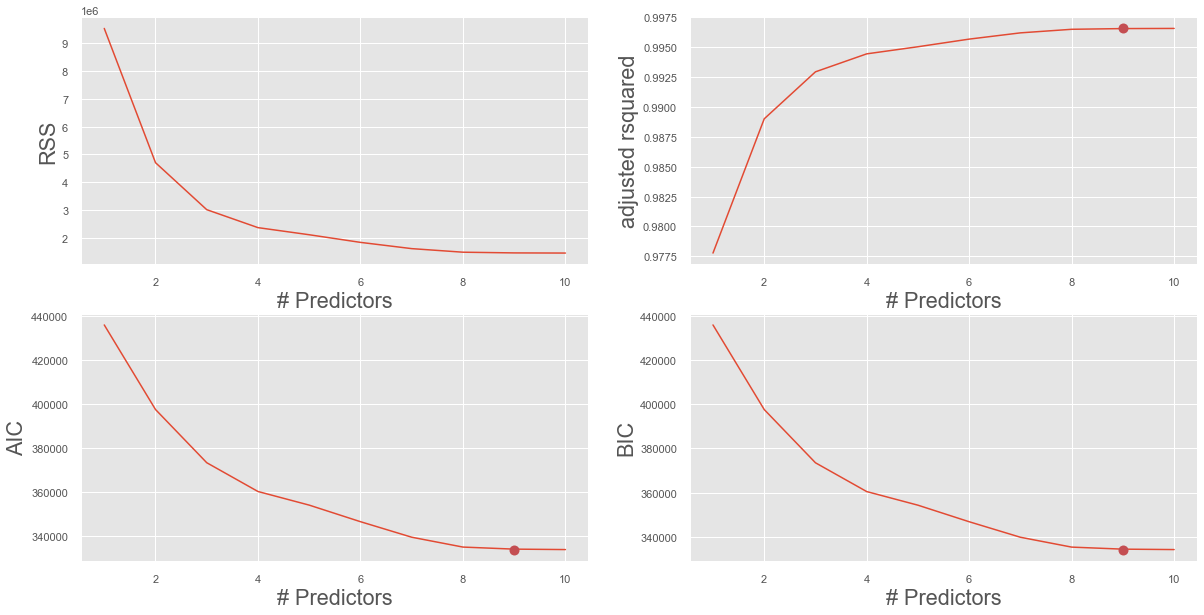

In [382]:
import matplotlib.style as style
 #sets the size of the charts
style.use('ggplot')
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')
plt.savefig('price23.svg', bbox_inches='tight')

In [275]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y.values.reshape(-1,1))

# Make predictions using the testing set
preds = regr.predict(X)

# The R mean squared error
import math
print('R Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y, preds)))

Mean squared error: 2.17


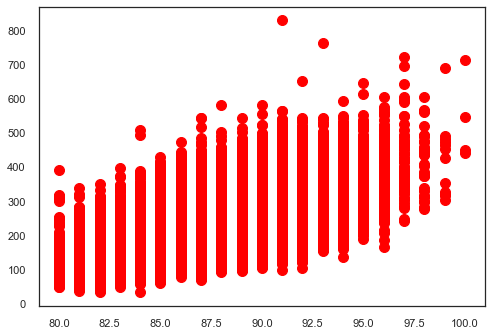

In [279]:
plt.scatter(y, X["description_length"], color= 'red')

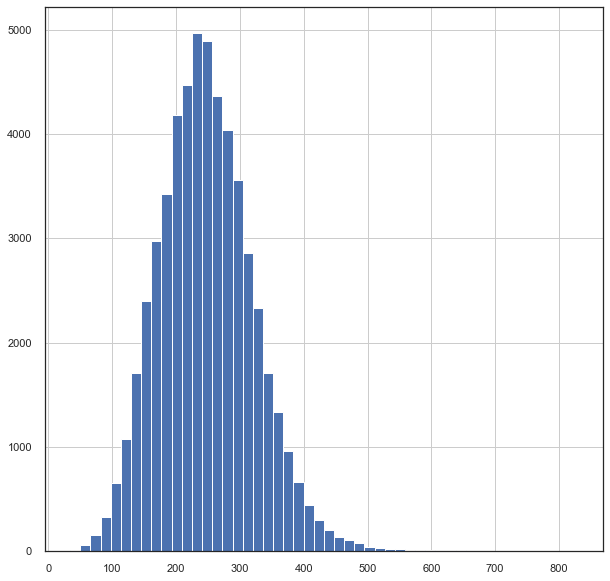

In [280]:
X.description_length.hist(bins=50, figsize=(10,10))
plt.show()

In [285]:
result=pd.read_csv('./result.csv')
filtered_wines=pd.read_csv('./filtered_wines.csv')
result

,Unnamed: 0,size,theta_hat,region_final
0,1,17,87.754571,1
1,2,4,86.743913,2
2,3,165,87.426550,3
3,4,7,87.710618,4
4,5,9,87.106706,5
...,...,...,...,...
71,72,81,87.206663,156
72,73,5,86.994121,157
73,74,38,86.808886,158
74,75,9,87.762677,159


In [287]:
filtered_wines.region_index

0       161
1       121
2       130
3       130
4        26
       ... 
4685     89
4686    130
4687    116
4688    121
4689    121
Name: region_index, Length: 4690, dtype: int64

In [298]:
regionane_dict = dict(zip(filtered_wines.region_index, filtered_wines.region_1))

In [302]:
result["region_name"] =result['region_final'].map(regionane_dict) 

In [303]:
result

,Unnamed: 0,size,theta_hat,region_final,region_name
0,1,17,87.754571,1,Aglianico del Vulture
1,2,4,86.743913,2,Alcamo
2,3,165,87.426550,3,Alto Adige
3,4,7,87.710618,4,Alto Adige Valle Isarco
4,5,9,87.106706,5,Asolo Prosecco Superiore
...,...,...,...,...,...
71,72,81,87.206663,156,Vernaccia di San Gimignano
72,73,5,86.994121,157,Veronese
73,74,38,86.808886,158,Vigneti delle Dolomiti
74,75,9,87.762677,159,Vino Nobile di Montepulciano


In [305]:
result=pd.read_csv('./catboost_info/result.csv')
filtered_wines=pd.read_csv('./catboost_info/filtered_wines.csv')

In [306]:
regionane_dict = dict(zip(filtered_wines.region_index, filtered_wines.region_1))

In [307]:
result["region_name"] =result['region_final'].map(regionane_dict) 

In [308]:
result.to_csv("sunit.csv")

In [383]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [384]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  10 models on 1 predictors in 0.6772723197937012 seconds.
Processed  9 models on 2 predictors in 0.2859973907470703 seconds.
Processed  8 models on 3 predictors in 0.4176468849182129 seconds.
Processed  7 models on 4 predictors in 0.40270519256591797 seconds.
Processed  6 models on 5 predictors in 0.3549327850341797 seconds.
Processed  5 models on 6 predictors in 0.3247835636138916 seconds.
Processed  4 models on 7 predictors in 0.2647855281829834 seconds.
Processed  3 models on 8 predictors in 0.31316614151000977 seconds.
Processed  2 models on 9 predictors in 0.19171500205993652 seconds.
Processed  1 models on 10 predictors in 0.09284710884094238 seconds.
Total elapsed time: 3.4603731632232666 seconds.


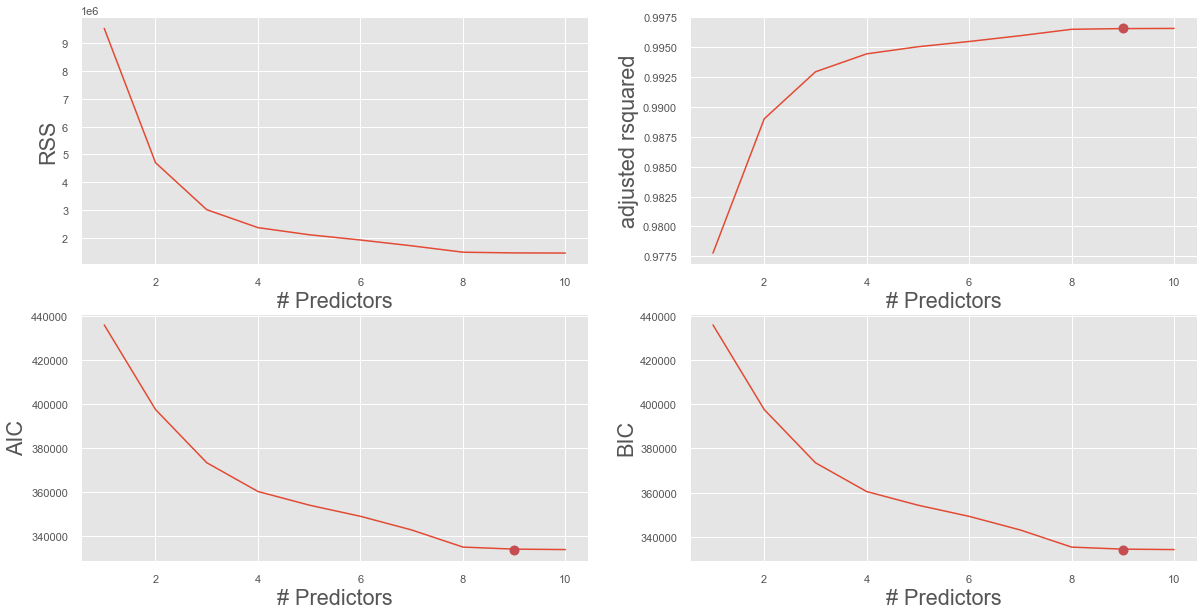

In [385]:
import matplotlib.style as style
 #sets the size of the charts
style.use('ggplot')
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_fwd["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_fwd.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_fwd.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_fwd.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')
plt.savefig('forward3.svg', bbox_inches='tight')